In [35]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [36]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query arxiv papers")
print(arxiv.name)

arxiv


In [37]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [38]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [43]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="c:/Users/Lenovo/Desktop/agentic_chatbot/.env")

import os

tavily_api_key = os.getenv("TAVILY_API_KEY")
groq_api_key = os.getenv("GROQ_API_KEY")

In [44]:
print("Key loaded:", groq_api_key)

Key loaded: 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


In [34]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults(tavily_api_key = tavily_api_key)

In [19]:
tavily.invoke("Provide me the latest AI news")

[{'title': 'The latest AI news we announced in June - Google Blog',
  'url': 'https://blog.google/technology/ai/google-ai-updates-june-2025/',
  'content': '# The latest AI news we announced in June\n\nJul 02, 2025\n\nHere’s a recap of some of our biggest AI updates from June, including more ways to search with AI Mode, a new way to share your NotebookLM notebooks publicly, and a new AI to help researchers better understand the human genome.\n\nSuperG\n\n## Basic explainer [...] a text card reading "AI to revolutionize scientific discovery"\n\nWe introduced AlphaGenome: AI to better understand the human genome. Our new, unifying DNA sequence model advances regulatory variant-effect prediction and promises to shed new light on genome function. To advance scientific research, we’re making AlphaGenome available in preview via our AlphaGenome API for non-commercial research, with plans to release the model in the future. [...] Search finds new voice, and photos bright,  \nWhile Chromebooks

In [20]:
# combine all these tools in the list

tools = [arxiv, wiki, tavily]

In [25]:
# initialize the LLM model

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-70b-8192", api_key=groq_api_key)

In [26]:
llm.invoke("What is AI?")

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}

In [ ]:
# bind the LLM with tools

llm_with_tools = llm.bind_tools(tools = tools)

In [ ]:
llm_with_tools.invoke("what is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cahr', 'function': {'arguments': '{"query":"recent news on AI advancements and developments"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 183, 'prompt_tokens': 356, 'total_tokens': 539, 'completion_time': 0.430876675, 'prompt_time': 0.029669288, 'queue_time': 1.1234876599999999, 'total_time': 0.460545963}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_28178d7ff6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2ecd070e-d458-45ca-8d96-423fb9462a5f-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI advancements and developments'}, 'id': 'call_cahr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 356, 'output_tokens': 183, 'total_tokens': 539})

In [ ]:
llm_with_tools.invoke("What is the latest research on quantum computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_y657', 'function': {'arguments': '{"query":"quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 357, 'total_tokens': 451, 'completion_time': 0.2285696, 'prompt_time': 0.045730337, 'queue_time': 0.24861232899999997, 'total_time': 0.274299937}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--80143ede-c893-47b8-8cf2-b0a4149018c7-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'call_y657', 'type': 'tool_call'}], usage_metadata={'input_tokens': 357, 'output_tokens': 94, 'total_tokens': 451})

In [ ]:
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xv4k', 'function': {'arguments': '{"query":"machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 154, 'prompt_tokens': 353, 'total_tokens': 507, 'completion_time': 0.352245087, 'prompt_time': 0.083251757, 'queue_time': 0.5755434, 'total_time': 0.435496844}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ea401d2e-6413-468c-8fef-7f4287cbfdf1-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'machine learning'}, 'id': 'call_xv4k', 'type': 'tool_call'}], usage_metadata={'input_tokens': 353, 'output_tokens': 154, 'total_tokens': 507})

In [ ]:
# Note the 'name' key in all the AIMessage. The LLM will know which tool to call based on the input provided by the user.

### Workflow using LangGraph

In [ ]:
from typing_extensions import TypedDict 
from langchain_core.messages import AnyMessage   ## Human Message or AI message
from typing import Annotated   ## labelling
from langgraph.graph.message import add_messages   ## Reducers in langgraph

In [ ]:
class State(TypedDict):
    # add_messages will not ovveride coming messages but rather append messaged inside the messages variable
    messages: Annotated[list[AnyMessage], add_messages]

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

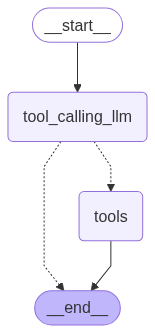

In [ ]:
# node definition
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # if the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # if the latest message (result) from assistant is not a tool call -> tools_condition routes to END
    tools_condition
)

builder.add_edge("tools", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages = graph.invoke({"messages": "1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_4mx2)
 Call ID: call_4mx2
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [ ]:
messages = graph.invoke({"messages": "Hi, I am Rupesh"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi, I am Rupesh
================================== Ai Message ==================================

Hello Rupesh! Nice to meet you. How can I assist you today? If you have any questions or need information on a specific topic, feel free to ask!


In [ ]:
# In second case, it didn't go for tool call. It directly went to END node. 

In [ ]:
messages = graph.invoke({"messages": "What are the recent AI news and tell me about the latest research in quantum computing."})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What are the recent AI news and tell me about the latest research in quantum computing.
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_mpfq)
 Call ID: call_mpfq
  Args:
    query: recent AI news
  arxiv (call_zs2w)
 Call ID: call_zs2w
  Args:
    query: latest research quantum computing artificial intelligence
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Latest AI Breakthroughs and News: May-June 2025 - Crescendo.ai", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "**Date:** June 1, 2025  \n**Summary:** Ukraine reportedly used AI-enhanced drone swarms in a covert mission dubbed âOperation Spider Webâ to target a Russian bomber. The drones, said to cost as little as the price of an iPhone 16 Pro, represent a new